In [106]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

column_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv("census_data.csv", header=None, names=column_names)

# Percentage of samples that have income greater than 50K and lower than 50K 
df.income.value_counts(normalize=True) * 100

income
 <=50K    75.919044
 >50K     24.080956
Name: proportion, dtype: float64

In [107]:
for column in column_names: 
  if df[column].dtype == 'O':
    # Eliminate whitespace 
    df[column] = df[column].str.strip()

In [108]:
# Features dataframe 
feature_cols = ['age',
       'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
X = pd.get_dummies(df[feature_cols], drop_first=True)
y = pd.get_dummies(df['income'], drop_first=True)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Building Random Forest Classifiers

In [89]:
from sklearn.ensemble import RandomForestClassifier
# Using default parameters 
rfc = RandomForestClassifier()
rfc.fit(X_train, np.array(y_train).ravel())
baseline_acc = rfc.score(X_test, y_test)
print(baseline_acc)

0.8159066482419776


In [109]:
# Tuning according to max_depth 
accuracy_train = []
accuracy_test = []

for i in range(1,26):
  rfc = RandomForestClassifier(max_depth=i)
  rfc.fit(X_train, np.array(y_train).ravel())
  accuracy_train.append(rfc.score(X_train, y_train))
  accuracy_test.append(rfc.score(X_test, y_test))

print(accuracy_train)
print(accuracy_test)


[0.7752226658476659, 0.8005605036855037, 0.8096974815724816, 0.8174907862407862, 0.8194103194103194, 0.8200245700245701, 0.8214066339066339, 0.8227886977886978, 0.823902027027027, 0.8270116707616708, 0.8331157862407862, 0.8353808353808354, 0.8389127764127764, 0.8420608108108109, 0.8446713759213759, 0.8463989557739557, 0.8493934275184275, 0.8523878992628993, 0.855382371007371, 0.8565724815724816, 0.8574938574938575, 0.8590678746928747, 0.8597589066339066, 0.8603347665847666, 0.8604499385749386]
[0.7881160755412252, 0.8109933978197451, 0.8203592814371258, 0.8291110087517273, 0.8301857822815907, 0.8303393213572854, 0.8303393213572854, 0.8311070167357593, 0.8311070167357593, 0.8323353293413174, 0.8329494856440964, 0.8340242591739597, 0.8320282511899278, 0.833256563795486, 0.831260555811454, 0.8324888684170121, 0.8300322432058959, 0.8281897742975587, 0.8257331490864425, 0.8243512974051896, 0.822815906648242, 0.8225088284968525, 0.822815906648242, 0.8218946721940734, 0.82081989866421]


In [110]:
# Max depth 
depths = list(range(1,26))
accuracy_test = np.array(accuracy_test)
accuracy_train = np.array(accuracy_train)
max_idx = accuracy_test.argmax()
print(f"Max accuracy {accuracy_test[max_idx]:.2f} at max_depth={depths[max_idx]}")

Max accuracy 0.83 at max_depth=12


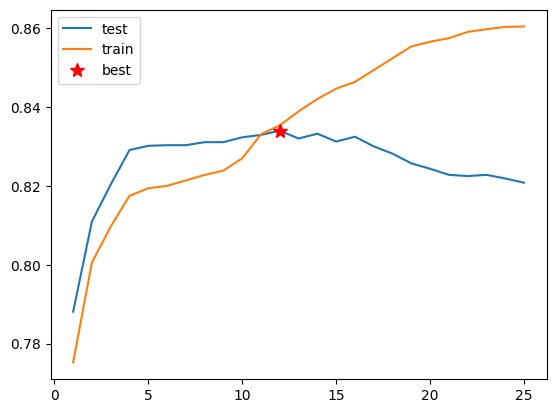

In [111]:
plt.plot(depths, accuracy_test, label='test')
plt.plot(depths, accuracy_train, label='train')
plt.plot(depths[max_idx], accuracy_test[max_idx], marker='*', markersize=10, color='r', label='best', linestyle='')
plt.legend()
plt.show()

In [112]:
# Refitting with max_depth 
rfc = RandomForestClassifier(max_depth=depths[max_idx])
rfc.fit(X_train, np.array(y_train).ravel())
feature_importances = rfc.feature_importances_

In [113]:
feature_importances_df = pd.DataFrame(feature_importances, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)
# Top five features 
feature_importances_df[:5]

,importance
capital-gain,0.372192
age,0.239820
hours-per-week,0.144965
capital-loss,0.141026
sex_Male,0.081592


### Additional features

In [119]:
# Creating the education_bin column 
df['education_bin'] = pd.cut(df['education-num'], [0, 9, 13, 16], labels=['High school and less', 'College to Bachelors', 'Masters and more'])

In [122]:
feature_cols = feature_cols + ['education_bin']
X = pd.get_dummies(df[feature_cols], drop_first=True)
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education_bin_College to Bachelors,education_bin_Masters and more
0,39,2174,0,40,True,False,False,False,True,True,False
1,50,0,0,13,True,False,False,False,True,True,False
2,38,0,0,40,True,False,False,False,True,False,False
3,53,0,0,40,True,False,True,False,False,False,False
4,28,0,0,40,False,False,True,False,False,True,False


In [123]:
# Split again
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [124]:
accuracy_train2 = []
accuracy_test2 = []
depths = range(1, 26)
for depth in depths: 
  rfc = RandomForestClassifier(max_depth=depth)
  rfc.fit(X_train, np.array(y_train).ravel())
  accuracy_train2.append(rfc.score(X_train, y_train))
  accuracy_test2.append(rfc.score(X_test, y_test))


In [133]:
# Max accuracy on test
accuracy_test2 = np.array(accuracy_test2)
accuracy_train2 = np.array(accuracy_train2)
max_idx2 = accuracy_test2.argmax()
print(f"Max accuracy of {accuracy_test2[max_idx2]:.2f} at a max_depth={depths[max_idx2]}") 

Max accuracy of 0.85 at a max_depth=12


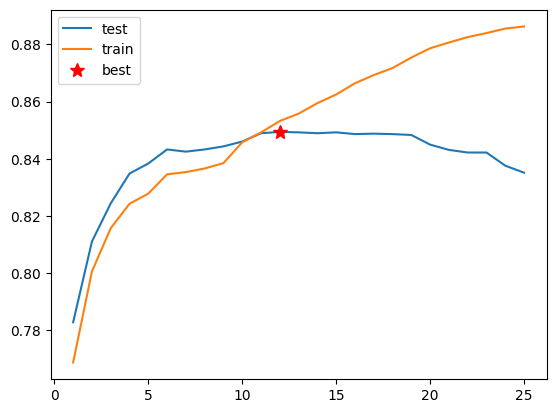

In [126]:
# Plot
plt.plot(depths, accuracy_test2, label='test')
plt.plot(depths, accuracy_train2, label='train')
plt.plot(depths[max_idx2], accuracy_test2[max_idx2], marker='*', markersize=10, color='r', label='best', linestyle='')
plt.legend()
plt.show()

In [134]:
rf = RandomForestClassifier(max_depth=depths[max_idx2])
rf.fit(X_train, np.array(y_train).ravel())
feature_importances = rf.feature_importances_

In [137]:
feature_importances_df2 = pd.DataFrame(feature_importances, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)
feature_importances_df2[:5]

,importance
capital-gain,0.313246
age,0.211534
hours-per-week,0.120069
education_bin_Masters and more,0.110178
capital-loss,0.102929
